In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Chem.Draw import IPythonConsole
#IPythonConsole.ipython_useSVG=True
#from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdFMCS

from mutate import replace

In [2]:
def cut(pdb, *, res):
    mol = Chem.Mol(pdb)
    d = Chem.rdmolops.SplitMolByPDBResidues(mol)
    emol = Chem.EditableMol(mol)

    for at in mol.GetAtoms():
        mi = at.GetMonomerInfo()
        res_name = mi.GetResidueName()
        if res_name == res:
            idx = at.GetIdx()
            emol.ReplaceAtom(idx, Chem.Atom('*'))

    prot = emol.GetMol()
    prot = AllChem.DeleteSubstructs(prot, Chem.MolFromSmiles('*'))
    lig = d[res]

    return lig, prot

In [3]:
pdb = Chem.rdmolfiles.MolFromPDBFile('data/1dmp/1dmp.pdb', removeHs=False)
lig, rest = cut(pdb, res='DMQ')

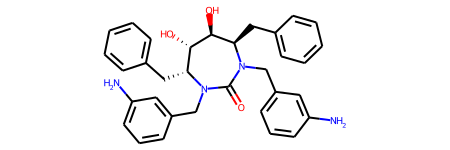

In [4]:
temp = Chem.MolFromSmiles('c1ccc(cc1)C[C@@H]2[C@@H]([C@H]([C@H](N(C(=O)N2Cc3cccc(c3)N)Cc4cccc(c4)N)Cc5ccccc5)O)O')
lig = Chem.AllChem.AssignBondOrdersFromTemplate(temp, lig)

_ = Chem.Mol(lig)
AllChem.Compute2DCoords(_)
_

## Edit molecule

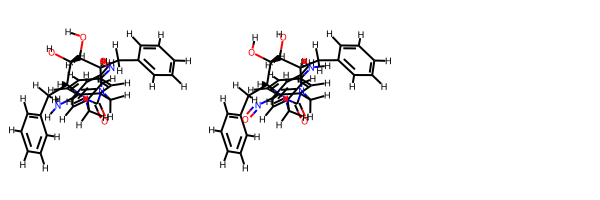

In [5]:
X = Chem.MolFromSmiles('N=O')

for at in X.GetAtoms():
    mi = Chem.AtomPDBResidueInfo()
    mi.SetIsHeteroAtom(True)
    mi.SetName(f' {at.GetSymbol()}  ')
    mi.SetResidueName('DMQ')
    mi.SetChainId('B')
    mi.SetResidueNumber(450)
    mi.SetOccupancy(0.0)
    mi.SetTempFactor(0.0)
    at.SetMonomerInfo(mi)

mols = replace(lig, '[NH2]', X)
Draw.MolsToGridImage(mols)

In [6]:
names = ['new-1', 'new-2']
mols = dict(zip(names, mols))

In [7]:
# export
for name, lig in mols.items():
    comb = AllChem.CombineMols(lig, rest)
    Chem.rdmolfiles.MolToPDBFile(comb, f'data/1dmp/1dmp-{name}.pdb')